# Star Wars Survey 

In this project we analyse data from a FiveThirtyEight survey on the first two Star Wars trilogies, whose results are reported in [this article](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) published on 22 July 2014.
We are particularly interested in determining which movies and characters are best liked by fans.

## Data cleaning

The dataset, `StarWars.csv`, was created by the FiveThirtyEight team and is encoded in ISO-8859-1. 
Some of its most important columns are: 

* `RespondentID`: an anonymized ID for each respondent
* `Gender`: the respondent's gender
* `Age`: the respondent's age
* `Household Income`: the respondent's household income
* `Education`: the respondent's education level
* `Location (Census Region)`: where the respondent lives
* `Have you seen any of the 6 films in the Star Wars franchise?`: whether the respondent has seen any of the films in the first two trilogies
* `Do you consider yourself to be a fan of the Star Wars film franchise?`: whether the respondent considers themselves a fan

We first load it into the Pandas dataframe `star_wars` and display the first 10 rows to look for possible inconsistencies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

star_wars = pd.read_csv('../Data/StarWars.csv', encoding='ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

The first line does not contain data, but only clarifies the meanings of some columns.

Number and types of objects in each column:

In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

There are 38 columns. 
All columns seem to contain strings except the first (`RespondentID`), which contains floats. 
All columns except the second one (`Have you seen any of the 6 films in the Star Wars franchise?`) have at least one null value. 
The first column has only one null value, on the first row; the others have more. 
There also seems to be two useless characters at the end of the column name `Do you consider yourself to be a fan of the Expanded Universe?æ`.

Let us rename some columns using shorter and/or more informative titles and delete the first row. 
Columns 15 to 28 are renamed using the information in the first row.

In [3]:
dict_replace_cols = {
    'Have you seen any of the 6 films in the Star Wars franchise?': 'seen_any',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'fan',
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'order_pref_1',
    'Unnamed: 10': 'order_pref_2',
    'Unnamed: 11': 'order_pref_3',
    'Unnamed: 12': 'order_pref_4',
    'Unnamed: 13': 'order_pref_5',
    'Unnamed: 14': 'order_pref_6',
    'Which character shot first?': 'shot_first',
    'Are you familiar with the Expanded Universe?': 'fam_exp_universe',
    'Do you consider yourself to be a fan of the Expanded Universe?æ': 'fan_exp_universe',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'fan_star_treck',
    'Household Income': 'Income',
    'Location (Census Region)': 'Location'
}
star_wars.rename(columns = dict_replace_cols, inplace=True)

cols_names = list(star_wars.columns)
for i in list(range(15,29)):
    cols_names[i] = star_wars.iloc[0,i]
star_wars.columns = cols_names

star_wars = star_wars.iloc[1:]

star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID            1186 non-null float64
seen_any                1186 non-null object
fan                     836 non-null object
seen_1                  673 non-null object
seen_2                  571 non-null object
seen_3                  550 non-null object
seen_4                  607 non-null object
seen_5                  758 non-null object
seen_6                  738 non-null object
order_pref_1            835 non-null object
order_pref_2            836 non-null object
order_pref_3            835 non-null object
order_pref_4            836 non-null object
order_pref_5            836 non-null object
order_pref_6            836 non-null object
Han Solo                829 non-null object
Luke Skywalker          831 non-null object
Princess Leia Organa    831 non-null object
Anakin Skywalker        823 non-null object
Obi Wan Kenobi          825 non-null object
Emperor Pa

Convert the values in the first column to integers: 

In [4]:
star_wars.iloc[:,0] = star_wars.iloc[:,0].astype(int)

The titles of columns 1, 2, 31, 32, and 33 (with the convention that the first column has index 0) are yes/no questions. 
These columns contain the values 'Yes' and 'No'. 
To ease the analysis, we convert them to the boolean values `True` and `False`.

In [5]:
yes_no_dict = {'Yes': True, 'No': False}
column_indices = [1, 2, 30, 31, 32]
for col in column_indices:
    star_wars.iloc[:,col] = star_wars.iloc[:,col].map(yes_no_dict)

In [6]:
star_wars.head()

,RespondentID,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,order_pref_1,...,Yoda,shot_first,fam_exp_universe,fan_exp_universe,fan_star_treck,Gender,Age,Income,Education,Location
1,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Convert columns 2 to 8 to bool values: 

In [7]:
def is_string(val):
    return type(val) == str

for i in range(3,9):
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(is_string)

Convert the orders of preference to numerical values:

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [9]:
star_wars.head()

,RespondentID,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,order_pref_1,...,Yoda,shot_first,fam_exp_universe,fan_exp_universe,fan_star_treck,Gender,Age,Income,Education,Location
1,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Analysis: best- and worst-liked movies

As a first indication of how much each movie is liked, we show the average ranking for each of them. 
The error bars show one standard error on each side of the average.

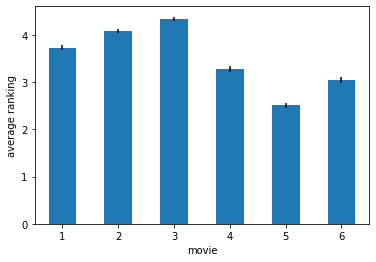

In [10]:
ave_rankings = star_wars.iloc[:,9:15].apply(np.mean)
ste_rankings = star_wars.iloc[:,9:15].apply(np.std) / np.sqrt(star_wars.iloc[:,9:15].count())
ave_rankings.index = range(1,7)
ave_rankings.plot.bar(yerr = list(ste_rankings), rot = 0)
plt.xlabel('movie')
plt.ylabel('average ranking')
plt.show()

The fifth episode has the best ranking by a statistically significant margin. 
The third episode has the worst ranking by a statistically significant margin. 

Let us now shos the number of views.

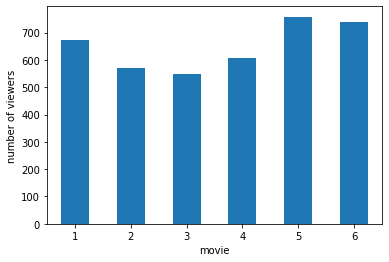

In [11]:
n_views = star_wars.iloc[:,3:9].apply(np.sum)
n_views.index = range(1,7)
n_views.plot.bar(rot = 0)
plt.xlabel('movie')
plt.ylabel('number of viewers')
plt.show()

The fifth episode has the largest number of views, while the third one has the lowest number of views. 
More generally, the number of respondents to have seen a movie showe a significant negative correlation with the ranking.

Let us now perform the same analysis for different groups of respondents. 
We first define the functions `plot_rankings_by` and `plot_n_viewers_by` doing the bar plots given a column name used to distinguish respondents.

In [12]:
def plot_rankings_by(col_name, pos_legend=None):
    groups = list(star_wars[col_name].dropna().unique())
    data_ave = []
    data_ste = []
    for group in groups:
        df = star_wars[star_wars[col_name] == group].iloc[:,9:15]
        data_ave.append(list(df.apply(np.mean)))
        data_ste.append(df.apply(np.std) / np.sqrt(df.count()))
    df_ave = pd.DataFrame(data_ave).transpose()
    df_ave.index = index=range(1,7)
    df_ave.columns = groups
    df_ave.plot.bar(yerr = data_ste, rot = 0)
    plt.xlabel('movie')
    plt.ylabel('average ranking')
    if(pos_legend != None):
        plt.legend(bbox_to_anchor=pos_legend)
    plt.show()
    
def plot_n_viewers_by(col_name, pos_legend=None):
    groups = list(star_wars[col_name].dropna().unique())
    data_count = []
    for group in groups:
        df = star_wars[star_wars[col_name] == group].iloc[:,3:9]
        data_count.append(list(df.apply(np.sum)))
    df_ave = pd.DataFrame(data_count).transpose()
    df_ave.index = index=range(1,7)
    df_ave.columns = groups
    df_ave.plot.bar(rot = 0)
    plt.xlabel('movie')
    plt.ylabel('number of viewers')
    if(pos_legend != None):
        plt.legend(bbox_to_anchor=pos_legend)
    plt.show()

We first divide the respondents by gender.

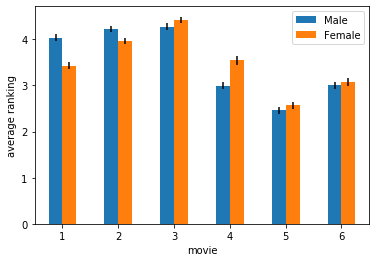

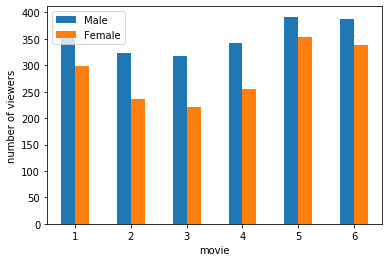

In [13]:
plot_rankings_by('Gender')
plot_n_viewers_by('Gender')

We notice that:
* On average, women have a better opinion than men of the first episode and a lower opinion of the fourth.
* Each episode has more male than female viewers. The gap is largest for the third episode and smallest for the fifth. 
Interestingly, the fraction of women having seen an episode seems to decrease with its average ranking. 

Let us compute the correlation coeficient between these two variables, as well as with the number of viewers.

In [14]:
n_female_viewers = star_wars[star_wars['Gender'] == 'Female'].iloc[:,3:9].apply(np.sum)
n_male_viewers = star_wars[star_wars['Gender'] == 'Male'].iloc[:,3:9].apply(np.sum)
frac_female_viewers = n_female_viewers / (n_female_viewers + n_male_viewers)

print('correlation coefficient between the fraction of female viewers and average ranking: {}'.format(np.corrcoef(list(frac_female_viewers), list(ave_rankings))[0][1]))
print('correlation coefficient between the fraction of female viewers and number of viewers: {}'.format(np.corrcoef(list(frac_female_viewers), list(n_views))[0][1]))

correlation coefficient between the fraction of female viewers and average ranking: -0.8460698256979539
correlation coefficient between the fraction of female viewers and number of viewers: 0.9942656122597326


*There is a strong negative correlation between the fraction of female viewers and average  ranking, and a very strong positive correlation between the fraction of female viewers and total number of viewers.*

Let us now distinguish between viewers depending on whether they identify as fans of the tar Wars franchise.

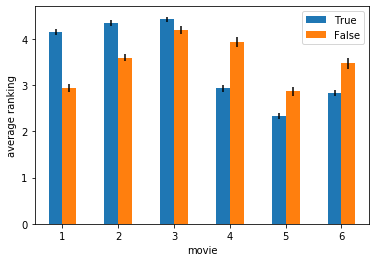

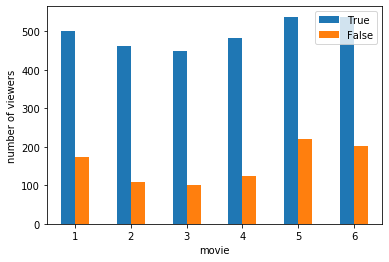

In [15]:
plot_rankings_by('fan')
plot_n_viewers_by('fan')

*Respondents who identify as fans have a significantly higher opinion of the oldest trilogy (episodes 4, 5, and 6) and a lower opinion of te newer one (episodes 1, 2, and 3).* 
For each episode, a large majority of respondents who has seen it identifies as a fan of the franchise.

Finally, let us distinguish between viewers depending on whether they identify as fans of the Start Treck franchise.

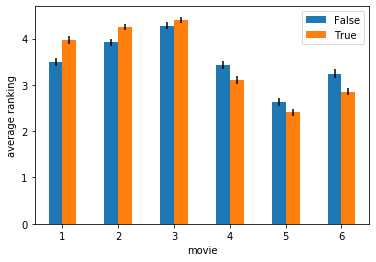

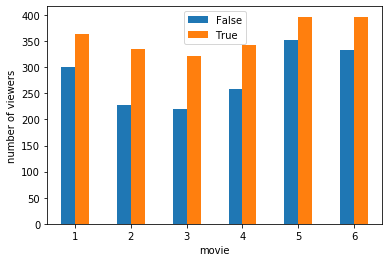

In [16]:
plot_rankings_by('fan_star_treck')
plot_n_viewers_by('fan_star_treck')

Viewers who identify as fans of the Star Treck franchise tend to also have a better opinion of the older trilogy and and lower opinion of the newer one. 
They also from a majority (although smaller than that of Star Wars self-identified fans) in the viewership of each episode. 

Let us do the same for the `Education` column:

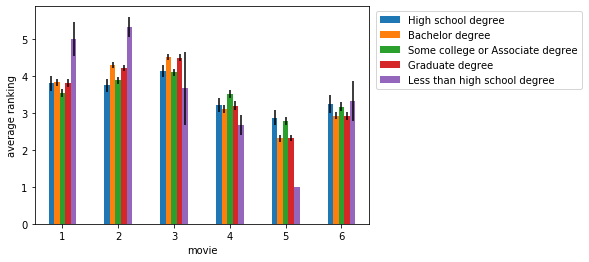

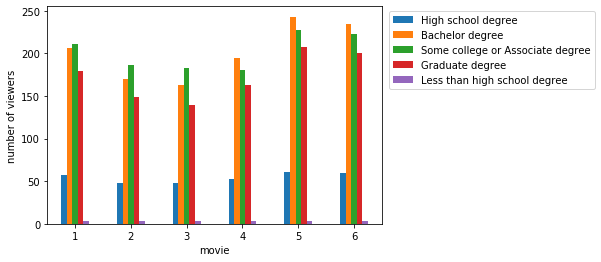

In [17]:
plot_rankings_by('Education', (1.65, 1.))
plot_n_viewers_by('Education', (1.65, 1.))

It seems that viewers with less than high school degree have, on average, a better opinion of the fifth movie and a worse opinion of the first two. 
However, the difference are smaller than two standard deviations and thus not very significant.

Finally, let us divide viewers according to their answer to the question “Who shot first” (referring to a scene in the 1977 version of episode IV which was edited in 1997, see [this Wikipedia page](https://en.wikipedia.org/wiki/Han_shot_first) for more information).

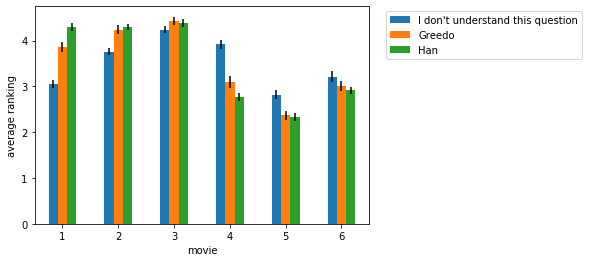

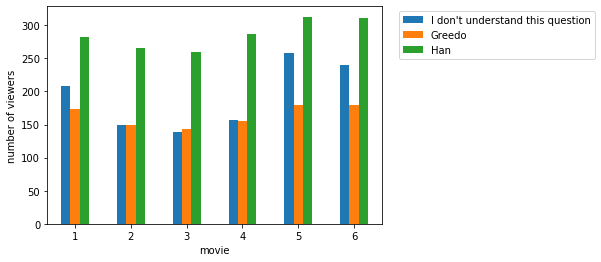

In [18]:
plot_rankings_by('shot_first', (1.65, 1.))
plot_n_viewers_by('shot_first', (1.65, 1.))

We first ntice that a plurality of viewers think that Han Solo shot first (in accordance with the 1977 version). 
These, and, to a lesser extent, viwers who think Greedo shot first (in accordance with the 1997 version) rate the omde trilogy higer than viewers who fo not understand the question. 
This seems to support the above observation that the older trilogy is especially popular among fans of the franchise, who probably pay more attention to details than non-fans.

## Analysis: Best- and worst-liked characters

We now would like to find the best- and worst-liked characters. 
To this end, we first need to replace the values in columns 15 to 28 by numbers. 
Let us see which values they contain: 

In [19]:
first_col_char = 15
last_col_char = 28
pd.Series(np.concatenate(star_wars.iloc[:,first_col_char:last_col_char+1].values)).value_counts()

Very favorably                                 5166
Somewhat favorably                             2569
Neither favorably nor unfavorably (neutral)    1647
Unfamiliar (N/A)                                852
Somewhat unfavorably                            654
Very unfavorably                                641
dtype: int64

We assign to each of these values a score: 
* “Very favorably” → +2
* “Somewhat favorably” → +1
* “Neither favorably nor unfavorably (neutral)” → 0
* “Unfamiliar (N/A)” → 0
* “Somewhat unfavorably” → -1
* “Very unfavorably” → -2

In [20]:
replacements = {
    'Very favorably': 2,
    'Somewhat favorably': 1, 
    'Neither favorably nor unfavorably (neutral)': 0, 
    'Unfamiliar (N/A)': 0,
    'Somewhat unfavorably': -1,
    'Very unfavorably': -2
}
for i in range(first_col_char, last_col_char+1):
    star_wars.iloc[:,i].replace(replacements, inplace=True)

We build two dictionaries `pop_char`with keys equal to character names and values equal to their average and the standard error: 

In [21]:
pop_char = {}
for i in range(first_col_char, last_col_char+1):
    pop_char[star_wars.columns[i]] = [
        star_wars.iloc[:,i].mean(), # average
        star_wars.iloc[:,i].std() / star_wars.iloc[:,i].count() # standard error
    ]

Let us plot the result: 

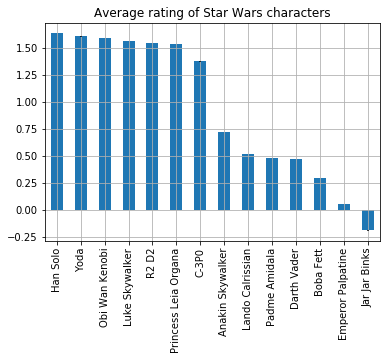

In [22]:
characters = pd.DataFrame.from_dict(pop_char, orient='index').sort_values(0, ascending=False) # dataframe containing the results
characters.plot.bar(y=0, yerr=1, legend=False)
plt.grid()
plt.title('Average rating of Star Wars characters')
plt.show()

A few points are readily apparent: 
* Only one character, Jar Jar Binks, has a negative average. 
* Most characters who appear in the older trilogy are more popular than characters who feature only in the newer one. (Two notable exceptions from this rule are Carth Vader and Emperor Palpatine.)
* There is a wide gap between the six bestliked characters and the others. 

In [23]:
for char in characters.index: 
    print('{} has an average rating of {:.3f}±{:.3f}.'.format(char, characters.loc[char, 0], characters.loc[char, 1]))

Han Solo has an average rating of 1.642±0.001.
Yoda has an average rating of 1.610±0.001.
Obi Wan Kenobi has an average rating of 1.599±0.001.
Luke Skywalker has an average rating of 1.569±0.001.
R2 D2 has an average rating of 1.551±0.001.
Princess Leia Organa has an average rating of 1.540±0.001.
C-3P0 has an average rating of 1.378±0.001.
Anakin Skywalker has an average rating of 0.727±0.001.
Lando Calrissian has an average rating of 0.522±0.001.
Padme Amidala has an average rating of 0.483±0.001.
Darth Vader has an average rating of 0.473±0.002.
Boba Fett has an average rating of 0.299±0.001.
Emperor Palpatine has an average rating of 0.058±0.001.
Jar Jar Binks has an average rating of -0.190±0.002.


The three best-liked characters, by statistically significant margins, are Han Solo, Yoda, and Obi Wan Kenobi. 
The three least-likes characters, also by statistically significant margins, are Boba Fett, Emperor Palpatine, and Jar Jar Binks. 

We are also interested in seeing if this ranking differes for fans of the franchise, who are more likely to see new movies or buy Star-Wars related products.

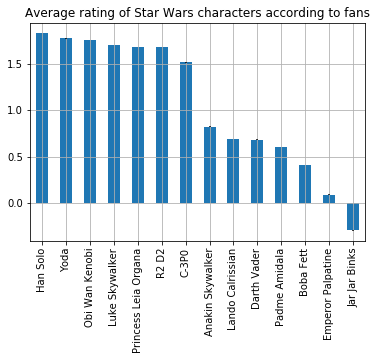

In [24]:
pop_char_fans = {}
for i in range(first_col_char, last_col_char+1):
    pop_char_fans[star_wars.columns[i]] = [
        star_wars[star_wars['fan']==True].iloc[:,i].mean(), # average
        star_wars[star_wars['fan']==True].iloc[:,i].std() / star_wars[star_wars['fan']==True].iloc[:,i].count() # standard error
    ]
    
characters_fans = pd.DataFrame.from_dict(pop_char_fans, orient='index').sort_values(0, ascending=False) # dataframe containing the results
characters_fans.plot.bar(y=0, yerr=1, legend=False)
plt.grid()
plt.title('Average rating of Star Wars characters according to fans')
plt.show()

Character ratings from fans is close to that by all viewers, although most characters have a slightly higher rating. 

Finally, we could like to see how character ratings vary with gender.

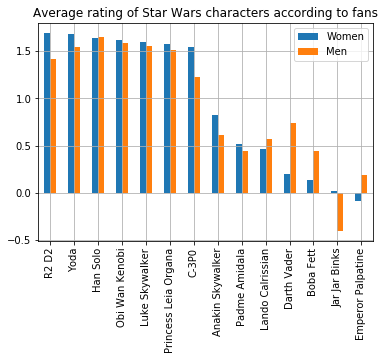

In [25]:
pop_char_gender = {}
for i in range(first_col_char, last_col_char+1):
    pop_char_gender[star_wars.columns[i]] = [
        star_wars[star_wars['Gender'] == 'Female'].iloc[:,i].mean(), # average
        star_wars[star_wars['Gender'] == 'Female'].iloc[:,i].std() / star_wars[star_wars['Gender'] == 'Female'].iloc[:,i].count(), # standard error
        star_wars[star_wars['Gender'] == 'Male'].iloc[:,i].mean(), # average
        star_wars[star_wars['Gender'] == 'Male'].iloc[:,i].std() / star_wars[star_wars['Gender'] == 'Male'].iloc[:,i].count() # standard error
    ]
    
characters_by_gender = pd.DataFrame.from_dict(pop_char_gender, orient='index').sort_values(0, ascending=False) # dataframe containing the results
characters_by_gender.columns = ['Women', 'Women_err', 'Men', 'Men_err']
characters_by_gender.plot.bar(y=['Women','Men'], yerr=characters_by_gender[['Women_err','Men_err']], legend=True)
plt.grid()
plt.title('Average rating of Star Wars characters according to fans')
plt.show()

There are a few significant differences: 
* The two robots R2D2 and C3PO are better liked by women than men, the former being even women's favourite character. 
* Men like the antagonists Darth Vader, Bobba Fett, and Emperor Palpatine better than women do.
* Men tend to dislike Jar Jar Binks, while women are nearly neutral about him on average. 

## Conclusions

In this short project, we explored a survey on the first two Star Wars trilogies  and found that:
* the older trilogy is more popular than the newer, especially among self-identified fans of the franchise, 
* there is a significant positive correlation between the number of viewers of a film, how well-liked it is, and the fraction of female viewers,
* Han Solo is the best-liked character overall, altough R2D2 is women's favourite character,
* men tend to dislike Jar Jar Binks, while women are nearly neutral about him on average.

One conclusion is that products focusing on the older trilogy and featuring Han Solo and/or R2D2 are expected to be popular among Star Wars fans.